# Build Your First Neural Network with PyTorch
Copyright 2022, LEAKY.AI LLC

This exercise is intended for anyone curious about building A.I. projects.  In order to complete this tutorial, follow along at https://www.leaky.ai. 

In this tutorial, we will build a neural network from scratch.  You will be introduced to PyTorch, a deep learning library managed by Meta's AI group and the power of neural networks.  We will be working on a synthetic dataset that catalogs the daily number of lemons sold at a lemon stand.  After training, the neural network will be ablet to predict the number of lemons that are likely going to be sold on a given day.  Lets get started!

### Option 1 - If using Google Colab
In order to complete this assignment:
1.	Copy the following link: https://github.com/LeakyAI/FirstNeuralNet
2.	Head over to Colab: https://colab.research.google.com/
3.	Click on GitHub and paste in the repo link above
4.	Click the magnify icon on the right side of the link you pasted above
5.	Click on the <b>FirstNeuralNetwork - Start Here.ipynb</b> notebook to get started

### Option 2 - If you are running the notebook directly on your own laptop/desktop
If you are using your own laptop or desktop and running the notebook locally, we recommend you complete the tutorial on how to configure your PC for A.I. at www.leaky.ai first and then attempt this tutorial.

Next, replace the <b>[TBD]</b> parts below with your code and execute all the cells.  Most cells will have the correct solution shown below the cell for you to check your results.

Good luck!

# Step 1 - Setup our Environment
Lets start by importing the software libraries we will need to build our neural network.  We will import PyTorch and check the version of PyTorch.  You will usually want to run the latest version.  Check the link below to verify you are running the latest version of PyTorch:
    
    https://pytorch.org/

In [1]:
# Import PyTorch libraries
import torch
from torch import nn 
import matplotlib.pyplot as plt

# Verify PyTorch libraries have been loaded
torch.__version__

'1.9.0'

### Check Our Processing Capability (CPU vs. GPU)

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('A {} device was found for processing'.format(device))

A cuda device was found for processing


### Download the Dataset
When training a neural network from scratch you will usually need a lot of data.  We will start by loading all the lemonade stand data which is a simply synthetic dataset.  It includes various fields like whether it was sunny, it was a weekend etc. on the day the sales took place.  The last field contains the number of lemonades actually sold.  This is the field we will want to train our neural network to predict.

In [3]:
# Use Pandas to do our dataprocessing on the dataset
import pandas as pd
#url = 'https://raw.githubusercontent.com/LeakyAI/FirstNeuralNet/main/lemons.csv'
#df = pd.read_csv(url)

df=pd.read_csv('lemons.csv')
df.head(10)

,Weekend,Sunny,Warm,BigSign,Price,NumberSold
0,1,0,0,1,9,71
1,1,1,1,0,10,137
2,0,1,0,0,10,0
3,1,0,0,1,6,107
4,1,0,0,1,8,80
5,1,1,0,0,6,110
6,1,1,1,0,8,167
7,0,0,1,1,8,0
8,1,0,1,0,8,124
9,1,1,0,0,7,95


In [4]:
df.shape

(365, 6)

# Step 2 - Prep our Data for the Neural Network

The data has been collected in a table with the following columns:  'Weekend', 'Afternoon', 'Sunny', 'Warm', 'Sign', 'CuteDog', 'Ballons', 'Discount', 'FreshlyPicked', 'Ice', 'CleanHouse', 'DogWalked', 'NumberLemonsSold'.  The number we want our neural network to predict is the field called 'NumberLemonsSold'!  In order to train our network, we will need to seperate out our "input" (x) to the neural network and the "output" (y) or value we want it to learn.  Below we take out the last column from the data and place it into "y".

# Create our Input X and Output Y


In [5]:
priceMean = df['Price'].mean()
priceStd = df['Price'].std()
numSoldMean = df['NumberSold'].mean()
numSoldStd = df['NumberSold'].std()

df['Price'] = (df['Price']-priceMean)/priceStd
df['NumberSold'] = (df['NumberSold']-numSoldMean)/numSoldStd

In [6]:
df.head()

,Weekend,Sunny,Warm,BigSign,Price,NumberSold
0,1,0,0,1,0.846650,-0.023669
1,1,1,1,0,1.452587,0.743734
2,0,1,0,0,1.452587,-0.849208
3,1,0,0,1,-0.971158,0.394915
4,1,0,0,1,0.240714,0.080977


In [7]:
# Create our PyTorch tensors and move to CPU or GPU if available
inputs = ['Weekend','Sunny','Warm','BigSign','Price']
outputs = ['NumberSold']
x = torch.tensor(df[inputs].values,dtype=torch.float, device=device)
y = torch.tensor(df[outputs].values,dtype=torch.float, device=device)

In [8]:
x[0:5]

tensor([[ 1.0000,  0.0000,  0.0000,  1.0000,  0.8467],
        [ 1.0000,  1.0000,  1.0000,  0.0000,  1.4526],
        [ 0.0000,  1.0000,  0.0000,  0.0000,  1.4526],
        [ 1.0000,  0.0000,  0.0000,  1.0000, -0.9712],
        [ 1.0000,  0.0000,  0.0000,  1.0000,  0.2407]], device='cuda:0')

In [9]:
y[0:5]

tensor([[-0.0237],
        [ 0.7437],
        [-0.8492],
        [ 0.3949],
        [ 0.0810]], device='cuda:0')

# Step 3 - Build our Neural Network
Below we build a simply neural network that will take in the inputs above (12) and produce a single value as an output.  This network has a single hidden layer of 30 units.

In [10]:
model = nn.Sequential(
            nn.Linear(5,100),
            nn.ReLU(),
            nn.Linear(100,1)
        )

# Move it to either the CPU or GPU depending on what we have available
model.to(device)

Sequential(
  (0): Linear(in_features=5, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

# Step 4 - Train our Neural Network

Here we will simply train our neural network on the dataset.  We will provide it with an input and and output.  The training loop will then adjust the weights within the neural network to make it more accuarate as we go through the training process.

In [11]:
import torch.optim as optim

# Meausure our neural network by mean square error
criterion = torch.nn.MSELoss()

# Train our network with a simple SGD approach
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Train our network a using the entire dataset 5 times
for epoch in range(20):
    totalLoss = 0
    for i in range(len(x)):
        optimizer.zero_grad()
        ypred = model(x[i])
        loss = criterion(ypred, y[i])
        totalLoss+=loss.item()
        loss.backward()
        optimizer.step()

    # Print out our loss after each training iteration
    print ("Total Loss: ", totalLoss)

Total Loss:  101.27235986437849
Total Loss:  11.838907861187117
Total Loss:  5.619098270533925
Total Loss:  3.7799761263890517
Total Loss:  3.0241496874741327
Total Loss:  2.4810600756145718
Total Loss:  2.0366625554252993
Total Loss:  1.7878987225712173
Total Loss:  1.5352493057848093
Total Loss:  1.3853473615960326
Total Loss:  1.2741323816580703
Total Loss:  1.1987988303531552
Total Loss:  1.0454552821385272
Total Loss:  0.9924530085559873
Total Loss:  0.9575036564210855
Total Loss:  0.8910547291345274
Total Loss:  0.7822214631242264
Total Loss:  0.7358219865772782
Total Loss:  0.7277845265152847
Total Loss:  0.6516747963641478


In [18]:
# Plot predictions vs. true values
@torch.no_grad() 
def graphPredictions(model, x, y , minValue, maxValue):
    
    model.eval()                               # Set the model to inference mode
    
    predictions=[]                             # Track predictions
    actual=[]                                  # Track the actual labels
    
    x.to(device)
    y.to(device)
    model.to(device)
    
    for i in range(len(x)):
        
        # Single forward pass
        pred = model(x[i])                               

        # Un-normalize our prediction
        pred = pred*numSoldStd+numSoldMean
        act = y[i]*numSoldStd+numSoldMean
        
        # Save prediction and actual label
        predictions.append(pred.tolist())
        actual.append(act.item())
    
    # Plot actuals vs predictions
    plt.scatter(actual, predictions)
    plt.xlabel('Actual Lemonades Sold')
    plt.ylabel('Predicted Lemonades Sold')
    plt.plot([minValue,maxValue], [minValue,maxValue]) 
    plt.xlim(minValue, maxValue)
    plt.ylim(minValue, maxValue)
 
    # Make the display equal in both dimensions
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

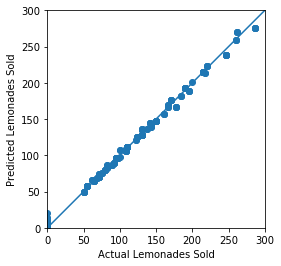

In [19]:
graphPredictions(model, x, y, 0, 300)

# Step 5 - Test our Neural Network Predictions

Below we makeup some input data and see what our predictions should be vs what the neural network predicted.

In [14]:
# Data that affects the number of lemons sold in one day
weekend = 1
sunny = 1
warm = 1    
bigsign = 1
price = 3

### Below we use the synthetic data generator forumla to determine what the actual result should have been.

In [15]:
numlemonssold = 0
if weekend:
    numlemonssold = (sunny*5  + int(500 / price))
    if bigsign:
        numlemonssold = 1.3 * numlemonssold
    if warm:
        numlemonssold = 2 * numlemonssold
    if sunny:
        numlemonssold = 1.25 * numlemonssold
numlemonssold = int(numlemonssold)    
print ("Actual Result: ", numlemonssold)

Actual Result:  555


Below we push that same input data into the neural network and see what it predicts.

In [23]:
# Normalize our inputs using the same values for our training
model.to('cpu')
price = (price - priceMean) / priceStd

x1 = torch.tensor([weekend, sunny, warm, bigsign, price],dtype=float)
y1 = model(x1.float())

# Un-normalize our output
y1 = y1*numSoldStd+numSoldMean
print("Neural Network Predicts: ", y1.item())

Neural Network Predicts:  673.2628173828125


# Step 6 - Next Steps
This is just a beginning but hopefully you can see how powerful neural networks can be!  There are lots of things we would do above to make it work even better including breaking the dataset up into a training, validation and testing set and fine tune our training a lot more.  

Head over to www.leaky.ai for more tutorials and also check out our Introduction to A.I. Programming Course at https://www.leaky.ai/introduction-to-ai-programming-with-pytorch-course-beginner.

Happy Learning!

leaky.ai team